In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
user_data = pd.read_csv('Recomendation Engine/train/user_data.csv')
problem_data = pd.read_csv('Recomendation Engine/train/problem_data.csv')
train_submission = pd.read_csv('Recomendation Engine/train/train_submissions.csv')
test_data = pd.read_csv('Recomendation Engine/test_data.csv')
submission = pd.read_csv('Recomendation Engine/sample_submission.csv')

In [3]:
print(user_data.shape)
print(problem_data.shape)
print(train_submission.shape)
print(test_data.shape)
print(submission.shape)

(3571, 11)
(6544, 4)
(155295, 3)
(66555, 3)
(0, 2)


In [4]:
submission.head()

,ID,attempts_range


In [5]:
user_data.head()

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436
1,user_3028,63,52,0,India,17,1498998165,405.677,339.450,intermediate,1441893325
2,user_2268,226,203,-8,Egypt,24,1505566052,307.339,284.404,beginner,1454267603
3,user_480,611,490,1,Ukraine,94,1505257499,525.803,471.330,advanced,1350720417
4,user_650,504,479,12,Russia,4,1496613433,548.739,486.525,advanced,1395560498


In [6]:
problem_data.head()

,problem_id,level_type,points,tags
0,prob_3649,H,NaN,NaN
1,prob_6191,A,NaN,NaN
2,prob_2020,F,NaN,NaN
3,prob_313,A,500.0,"greedy,implementation"
4,prob_101,A,500.0,"constructive algorithms,greedy,math"


In [7]:
train_submission.head()

,user_id,problem_id,attempts_range
0,user_232,prob_6507,1
1,user_3568,prob_2994,3
2,user_1600,prob_5071,1
3,user_2256,prob_703,1
4,user_2321,prob_356,1


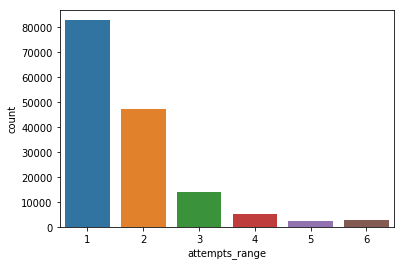

In [8]:
sns.countplot(train_submission.attempts_range)

In [9]:
train_submission.attempts_range.value_counts()

1    82804
2    47320
3    14143
4     5499
6     3033
5     2496
Name: attempts_range, dtype: int64

In [10]:
test_data.head()

,ID,user_id,problem_id
0,user_856_prob_5822,user_856,prob_5822
1,user_2642_prob_2334,user_2642,prob_2334
2,user_2557_prob_2920,user_2557,prob_2920
3,user_1572_prob_4598,user_1572,prob_4598
4,user_295_prob_6139,user_295,prob_6139


In [11]:
data = pd.merge(train_submission, user_data, how='left')

In [12]:
user_data.isnull().sum()

user_id                         0
submission_count                0
problem_solved                  0
contribution                    0
country                      1153
follower_count                  0
last_online_time_seconds        0
max_rating                      0
rating                          0
rank                            0
registration_time_seconds       0
dtype: int64

In [13]:
train_submission.isnull().sum()

user_id           0
problem_id        0
attempts_range    0
dtype: int64

In [14]:
data.isnull().sum()

user_id                          0
problem_id                       0
attempts_range                   0
submission_count                 0
problem_solved                   0
contribution                     0
country                      37853
follower_count                   0
last_online_time_seconds         0
max_rating                       0
rating                           0
rank                             0
registration_time_seconds        0
dtype: int64

In [15]:
problem_data.isnull().sum()

problem_id       0
level_type     133
points        3917
tags          3484
dtype: int64

In [16]:
data = pd.merge(data, problem_data, how='left')

In [17]:
data.isnull().sum()

user_id                          0
problem_id                       0
attempts_range                   0
submission_count                 0
problem_solved                   0
contribution                     0
country                      37853
follower_count                   0
last_online_time_seconds         0
max_rating                       0
rating                           0
rank                             0
registration_time_seconds        0
level_type                     620
points                       29075
tags                         15427
dtype: int64

In [18]:
data.nunique()

user_id                      3529
problem_id                   5776
attempts_range                  6
submission_count              936
problem_solved                902
contribution                  138
country                        79
follower_count                297
last_online_time_seconds     3497
max_rating                    946
rating                       1306
rank                            4
registration_time_seconds    3528
level_type                     14
points                         29
tags                          850
dtype: int64

In [19]:
user_problem = data[['user_id', 'problem_id']]

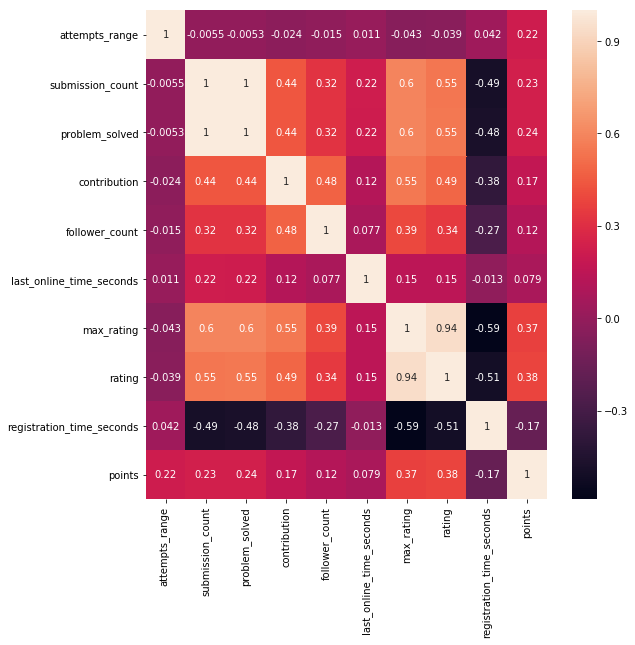

In [20]:
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(), annot=True)

In [139]:
data_1 = train_submission.pivot_table(values='attempts_range', index='problem_id', columns='user_id').fillna(0)

In [140]:
data_1.head()

user_id,user_1,user_10,user_100,user_1000,user_1001,user_1002,user_1003,user_1004,user_1005,user_1006,...,user_990,user_991,user_992,user_993,user_994,user_995,user_996,user_997,user_998,user_999
problem_id,,,,,,,,,,,,,,,,,,,,,
prob_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
prob_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
prob_100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
prob_1000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
prob_1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
new_index_1 = pd.Series(data_1.index).apply(lambda x: np.asarray(re.findall(r'\d+', x))[0])
data_1.index = new_index_1
data_1.index = data_1.index.astype(int)
data_1.sort_index(inplace=True)

In [146]:
data_1.head()

user_id,user_1,user_10,user_100,user_1000,user_1001,user_1002,user_1003,user_1004,user_1005,user_1006,...,user_990,user_991,user_992,user_993,user_994,user_995,user_996,user_997,user_998,user_999
problem_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
problem_data.set_index('problem_id', inplace=True)
problem_data.index = pd.Series(problem_data.index).apply(lambda x: np.asarray(re.findall(r'\d+', x))[0])
problem_data.index = problem_data.index.astype(int)
problem_data.sort_index(inplace=True)

In [156]:
problem_data.head()

,level_type,points,tags
problem_id,,,
1,A,NaN,NaN
2,G,NaN,NaN
3,B,1000.0,binary search
4,D,NaN,"*special,implementation"
5,C,1500.0,greedy


In [157]:
mean_attempts_user = data_1.sum()/np.count_nonzero(data_1, axis=0)

In [158]:
mean_attempts_user.shape

(3529,)

In [159]:
max(mean_attempts_user)

4.75

In [160]:
mean_attempts_user.describe()

count    3529.000000
mean        1.794887
std         0.341158
min         1.000000
25%         1.571429
50%         1.750000
75%         1.972222
max         4.750000
dtype: float64

([<matplotlib.axis.XTick at 0x1d8b13e4e10>,
 <a list of 12 Text xticklabel objects>)

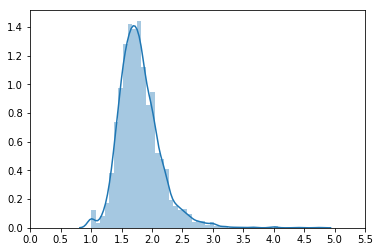

In [161]:
sns.distplot(mean_attempts_user)
plt.xticks(np.arange(0, 6, 0.5))

In [162]:
from scipy.sparse import csr_matrix

data_1_cm = csr_matrix(data_1)

In [163]:
words = set()
for row in data.tags.dropna() :
    word = set((re.split(r'[\,]', row)))
    words.update(word)
    
len(words)

36

In [164]:
data_1_cm.count_nonzero()

155295

In [165]:
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

norm = Normalizer()
nmf = NMF(n_components=36)

nmf_data = nmf.fit_transform(data_1_cm)
norm_data = norm.fit_transform(nmf_data)

In [166]:
df_prob = pd.DataFrame(norm_data, index=data_1.index)

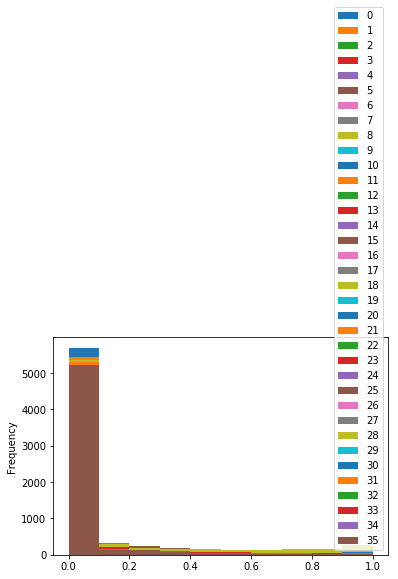

In [167]:
df_prob.plot.hist(bins=10)

In [286]:
prob = df_prob.loc[100]

similarities = df_prob.dot(prob)

In [287]:
similarities = pd.DataFrame(similarities,columns=['score'])
similarities['Problem Type'] = problem_data.tags

In [294]:
similarities.nlargest(5,'score')

,score,Problem Type
problem_id,,
100,1.000000,NaN
1694,1.000000,NaN
5599,1.000000,NaN
2737,0.905152,NaN
1739,0.901359,NaN


In [289]:
problem_data.isnull().sum()

level_type     133
points        3917
tags          3484
dtype: int64

In [290]:
problem_data.shape

(6544, 3)